In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


In [2]:
data = pd.read_csv("owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
data.isnull().sum()

iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302512 entries, 0 to 302511
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302512 non-null  object 
 1   continent                                   288160 non-null  object 
 2   location                                    302512 non-null  object 
 3   date                                        302512 non-null  object 
 4   total_cases                                 266771 non-null  float64
 5   new_cases                                   294064 non-null  float64
 6   new_cases_smoothed                          292800 non-null  float64
 7   total_deaths                                246214 non-null  float64
 8   new_deaths                                  294139 non-null  float64
 9   new_deaths_smoothed                         292909 non-null  float64
 

Data Cleaning

In [6]:
countries = data['location'].unique()
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [7]:
df = data.dropna(axis=1, how='all')

In [8]:
df['date'] = pd.to_datetime(df['date'])
print("Date column converted to datetime format")

# Extract useful time components
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

Date column converted to datetime format


In [9]:
# Select relevant columns for our analysis
key_columns = [
    'iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred'
]

In [10]:
# Select countries of interest for detailed analysis
countries_of_interest = ['United States', 'India', 'Brazil', 'United Kingdom', 'South Africa', 'Tanzania','Kenya']
df_countries = df[df['location'].isin(countries_of_interest)]
print(f"Filtered data to focus on {len(countries_of_interest)} countries of interest")

Filtered data to focus on 7 countries of interest


In [11]:
# Calculate fatality rate
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases'] * 100).round(2)

In [12]:
# Handle missing values for key metrics
for col in ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']:
    if col in df.columns:
        df[col] = df.groupby('location')[col].fillna(method='ffill')

print("Handled missing values using forward fill within each country")

Handled missing values using forward fill within each country


EDA


In [13]:
# Function to plot time series data
def plot_time_series(data, countries, y_column, title, ylabel, start_date=None):
    plt.figure(figsize=(14, 8))
    
    # Filter data if start_date is provided
    if start_date:
        data = data[data['date'] >= start_date]
    
    for country in countries:
        country_data = data[data['location'] == country]
        plt.plot(country_data['date'], country_data[y_column], marker='', linewidth=2, label=country)
    
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.tight_layout()
    return plt

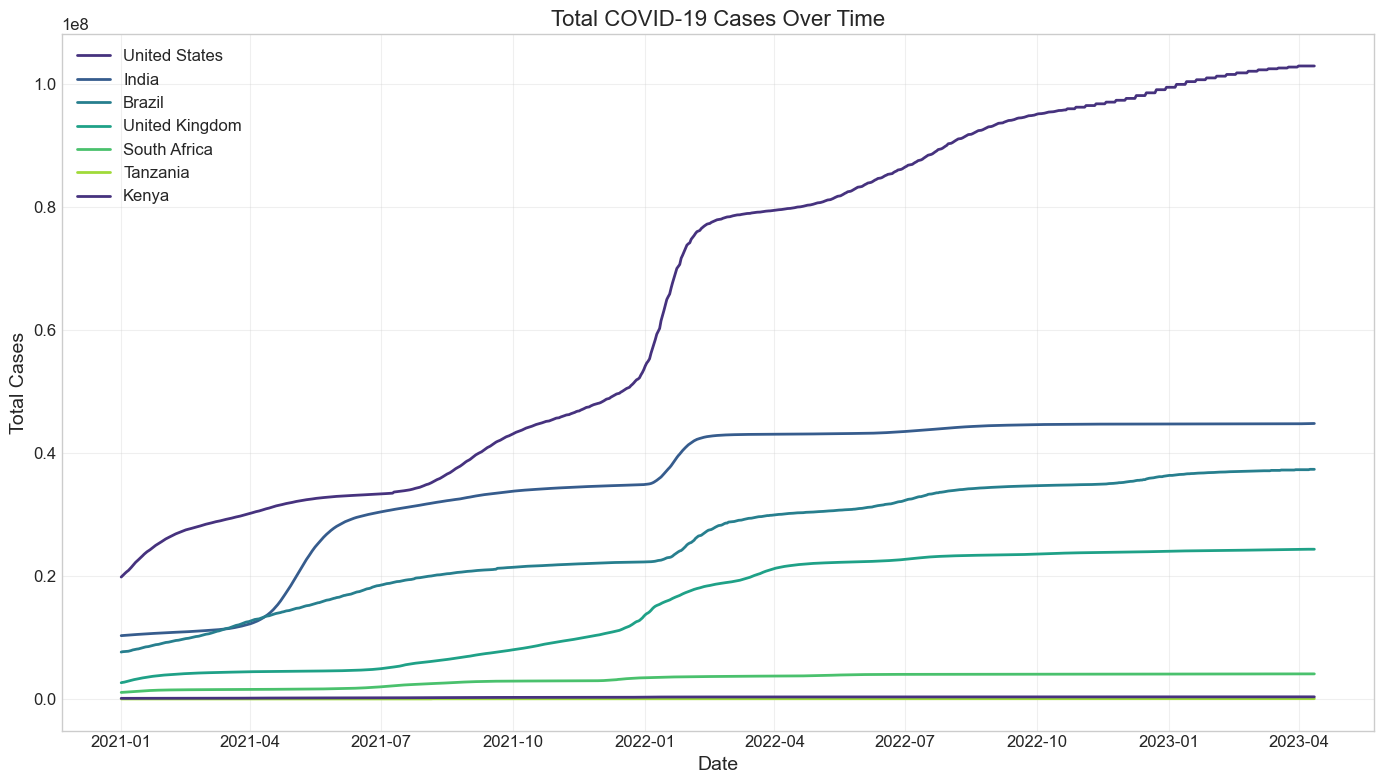

In [14]:
# Set the start date for analysis (e.g., beginning of 2021)
start_date = '2021-01-01'

# 1. Plot total cases over time
total_cases_plot = plot_time_series(
    df_countries, 
    countries_of_interest, 
    'total_cases', 
    'Total COVID-19 Cases Over Time', 
    'Total Cases', 
    start_date
)
total_cases_plot.show()

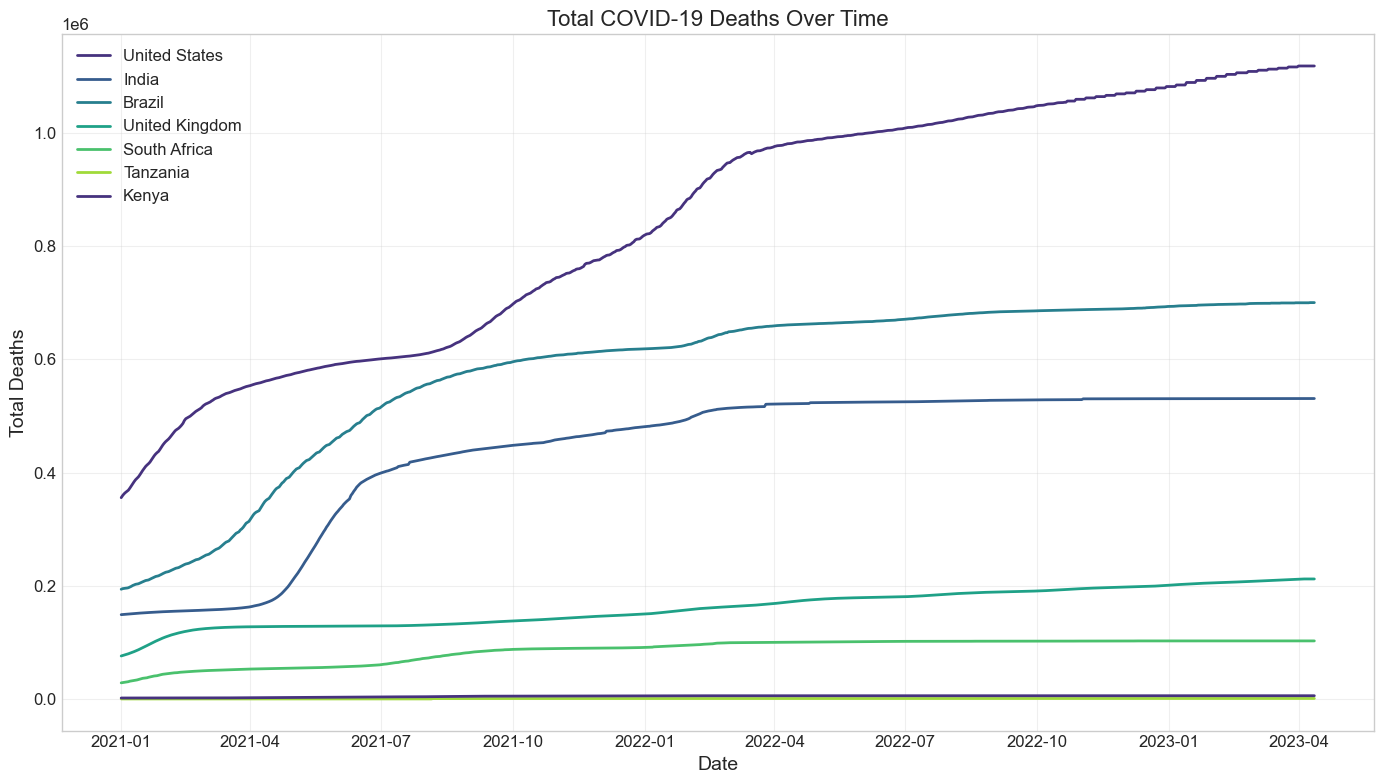

In [15]:
# 2. Plot total deaths over time
total_deaths_plot = plot_time_series(
    df_countries, 
    countries_of_interest, 
    'total_deaths', 
    'Total COVID-19 Deaths Over Time', 
    'Total Deaths', 
    start_date
)
total_deaths_plot.show()

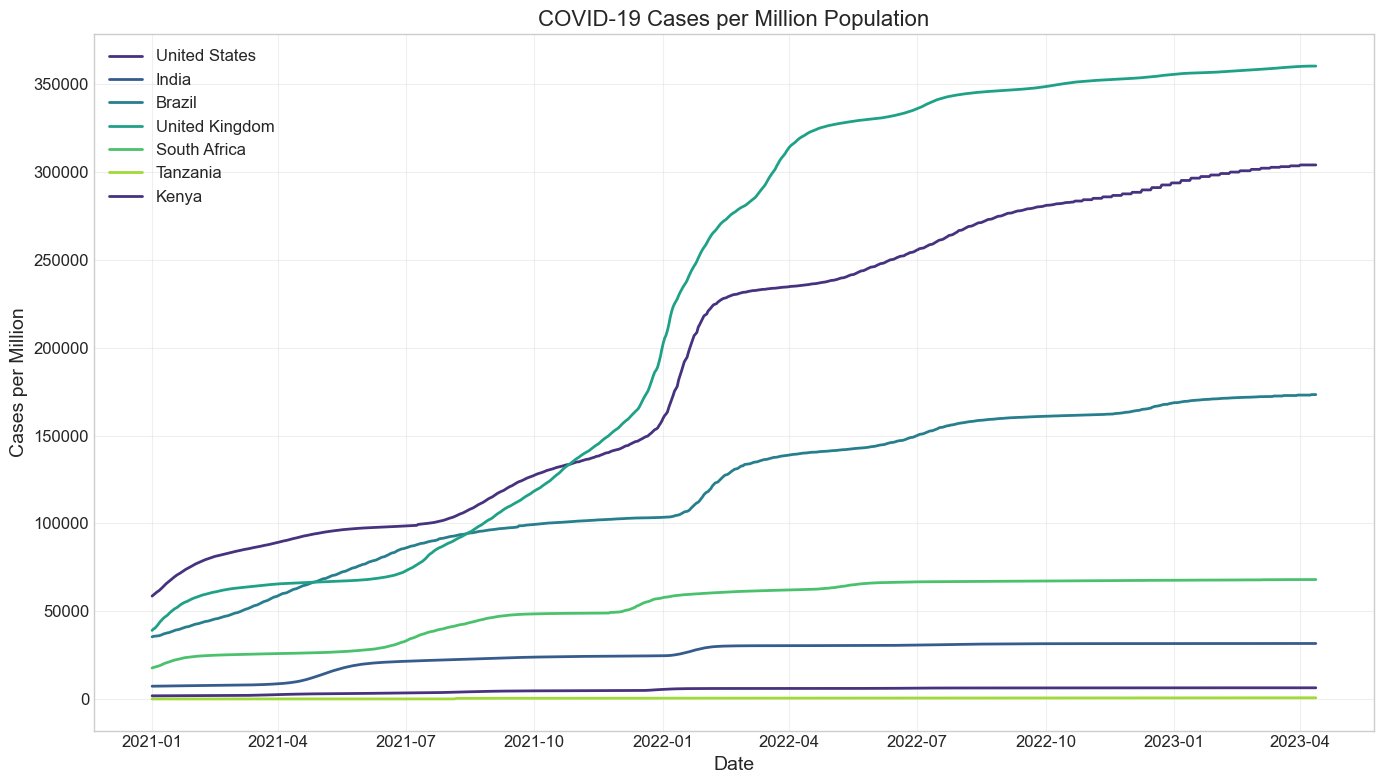

In [16]:
#3. Plot cases per million for fair comparison
cases_per_million_plot = plot_time_series(
    df_countries, 
    countries_of_interest, 
    'total_cases_per_million', 
    'COVID-19 Cases per Million Population', 
    'Cases per Million', 
    start_date
)
cases_per_million_plot.show()

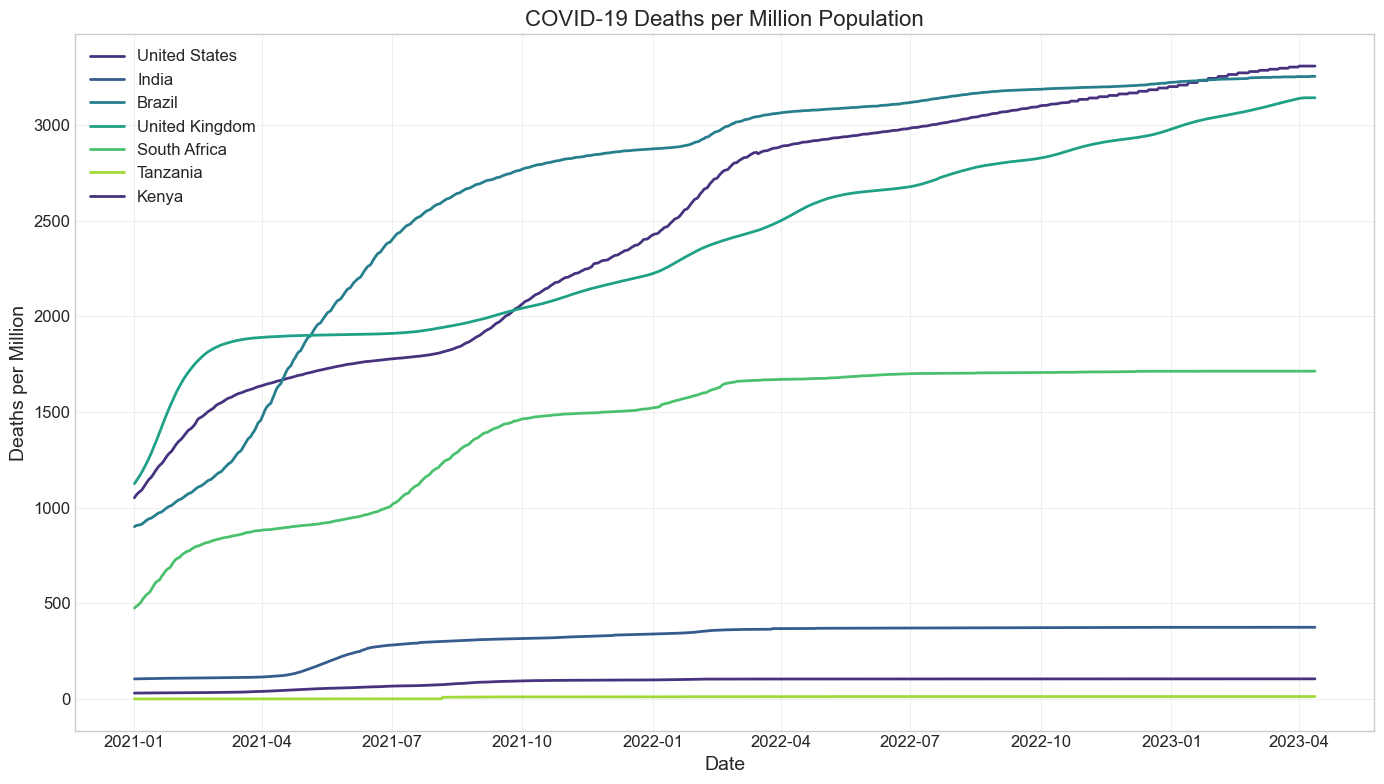

In [17]:
# 4. Plot deaths per million for fair comparison
deaths_per_million_plot = plot_time_series(
    df_countries, 
    countries_of_interest, 
    'total_deaths_per_million', 
    'COVID-19 Deaths per Million Population', 
    'Deaths per Million', 
    start_date
)
deaths_per_million_plot.show()

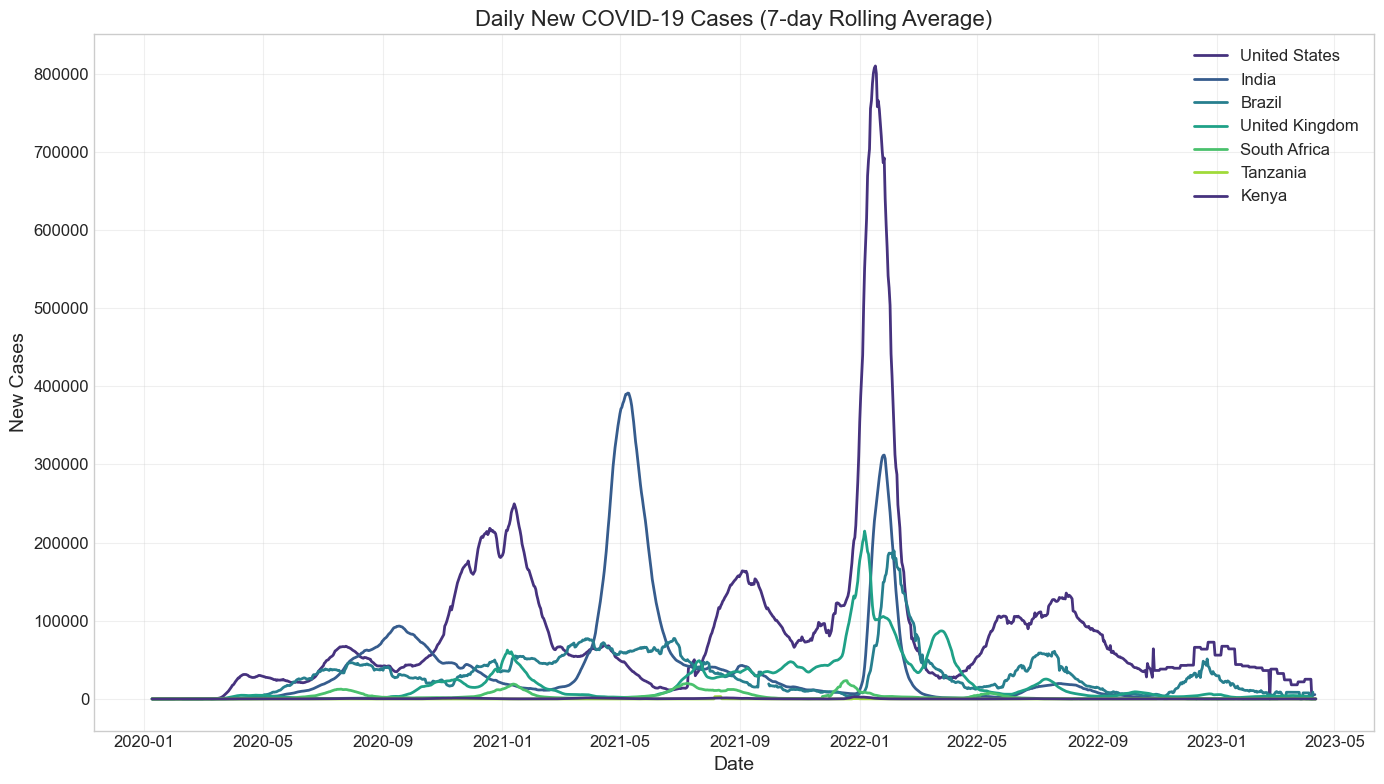

In [18]:
# 5. Daily new cases for selected countries
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = df_countries[df_countries['location'] == country]
    # 7-day rolling average to smooth out reporting inconsistencies
    country_data['new_cases_smoothed'] = country_data['new_cases'].rolling(window=7).mean()
    plt.plot(country_data['date'], country_data['new_cases_smoothed'], linewidth=2, label=country)

plt.title('Daily New COVID-19 Cases (7-day Rolling Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


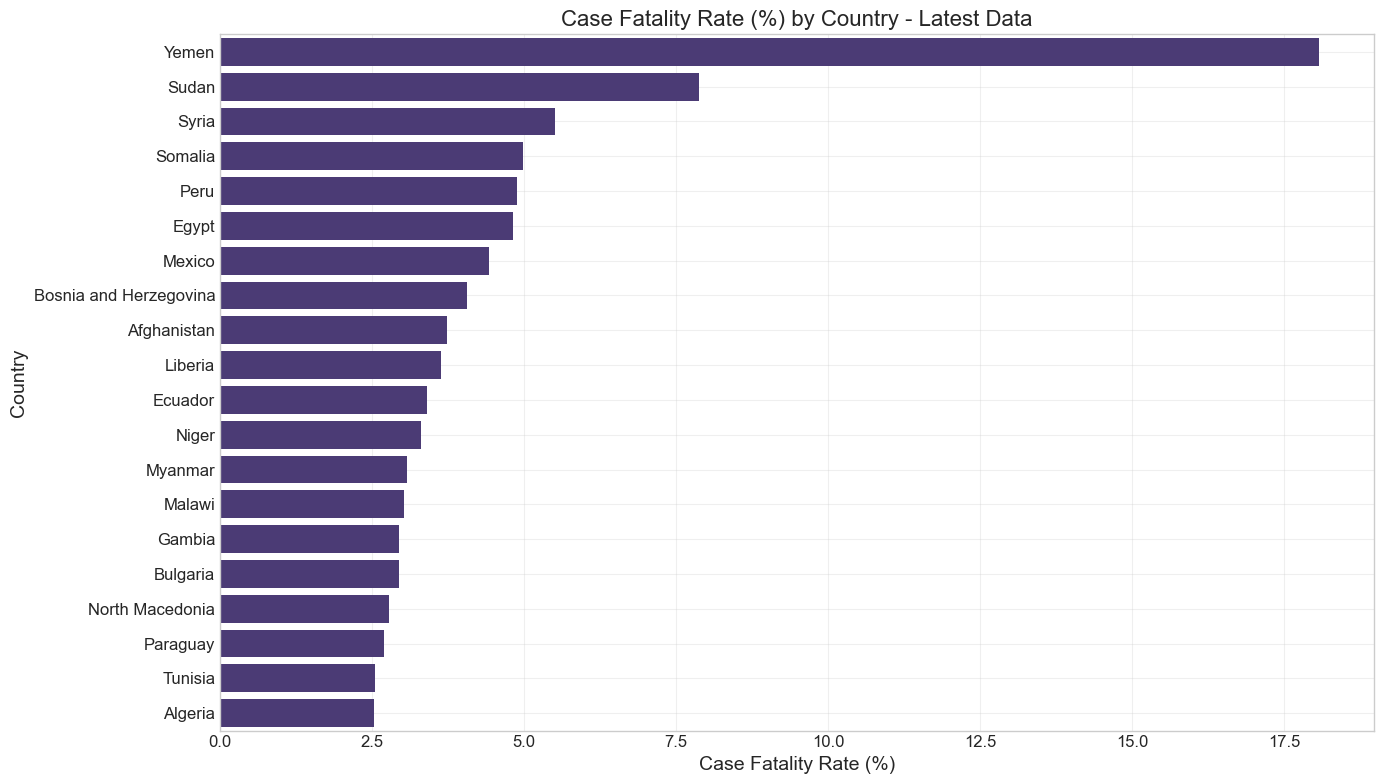

In [19]:
# 6. Compare case fatality rates
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
latest_data = latest_data.sort_values('case_fatality_rate', ascending=False)

plt.figure(figsize=(14, 8))
top_countries = latest_data.head(20)  # Top 20 countries by case fatality rate
sns.barplot(x='case_fatality_rate', y='location', data=top_countries)
plt.title('Case Fatality Rate (%) by Country - Latest Data', fontsize=16)
plt.xlabel('Case Fatality Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

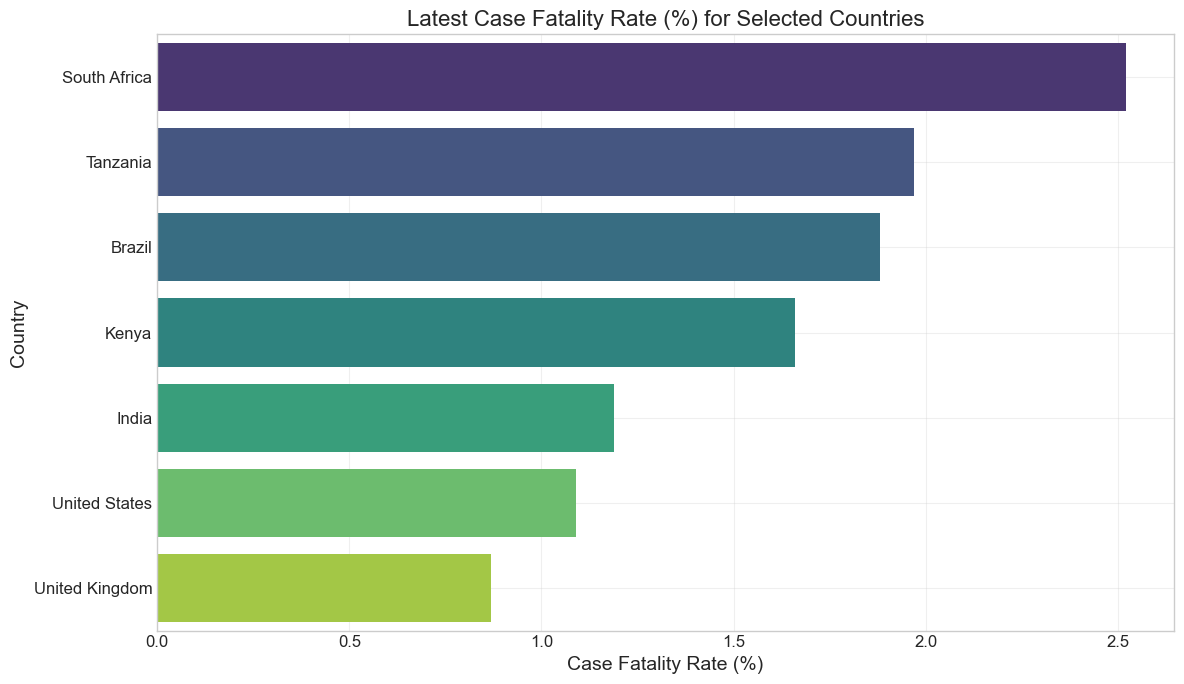

In [20]:
plt.figure(figsize=(12, 7))
# Bar graph: Latest case fatality rate for selected countries
latest_selected = latest_data[latest_data['location'].isin(countries_of_interest)].copy()
latest_selected = latest_selected.sort_values('case_fatality_rate', ascending=False)

sns.barplot(
    x='case_fatality_rate',
    y='location',
    data=latest_selected,
    palette='viridis'
)
plt.title('Latest Case Fatality Rate (%) for Selected Countries', fontsize=16)
plt.xlabel('Case Fatality Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Visualizing Vaccination Progress

In [21]:
# Filter data to include only rows with vaccination data
df_vax = df.dropna(subset=['total_vaccinations_per_hundred'])

# Plot vaccination progress for countries of interest
vax_countries = df_vax[df_vax['location'].isin(countries_of_interest)]

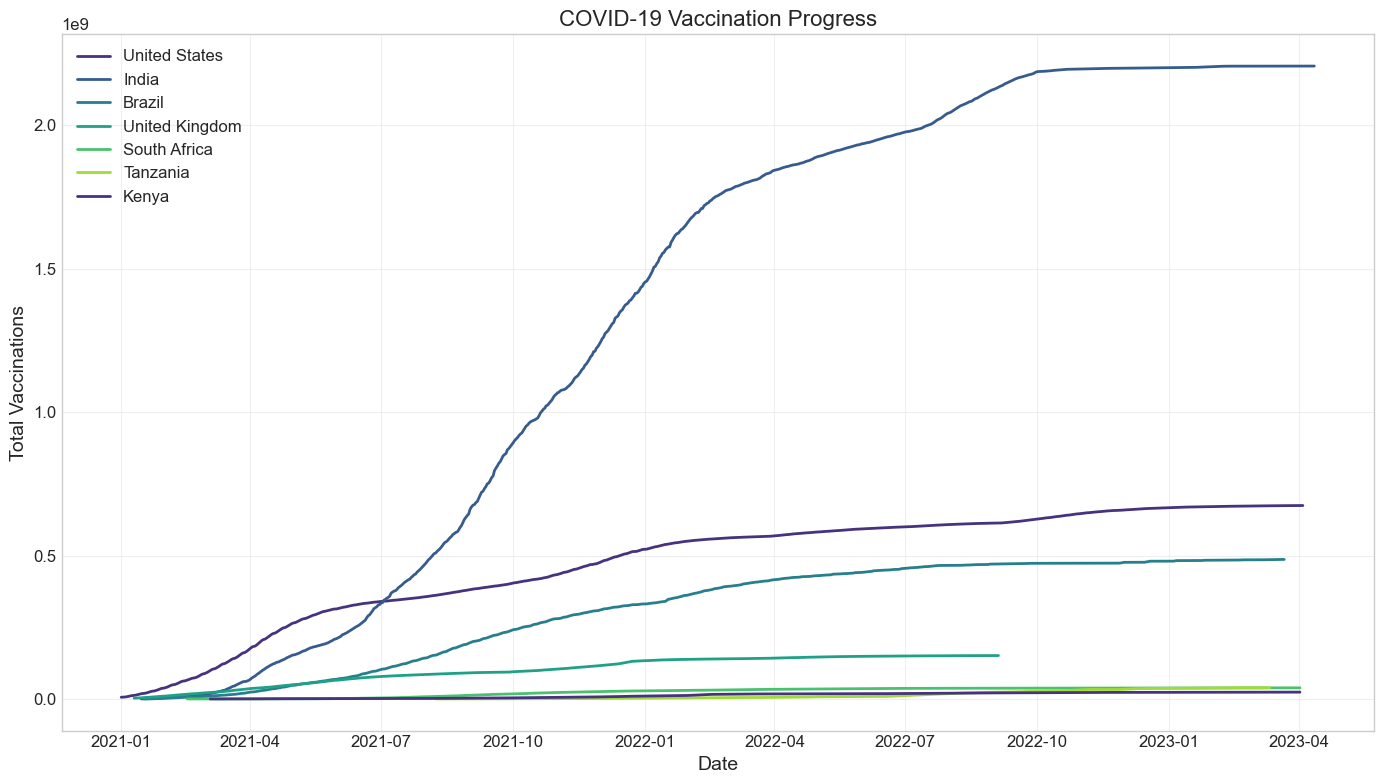

In [22]:
# 1. Plot total vaccinations over time
if 'total_vaccinations' in df_vax.columns:
    vax_plot = plot_time_series(
        vax_countries, 
        countries_of_interest, 
        'total_vaccinations', 
        'COVID-19 Vaccination Progress', 
        'Total Vaccinations', 
        start_date
    )
    vax_plot.show()

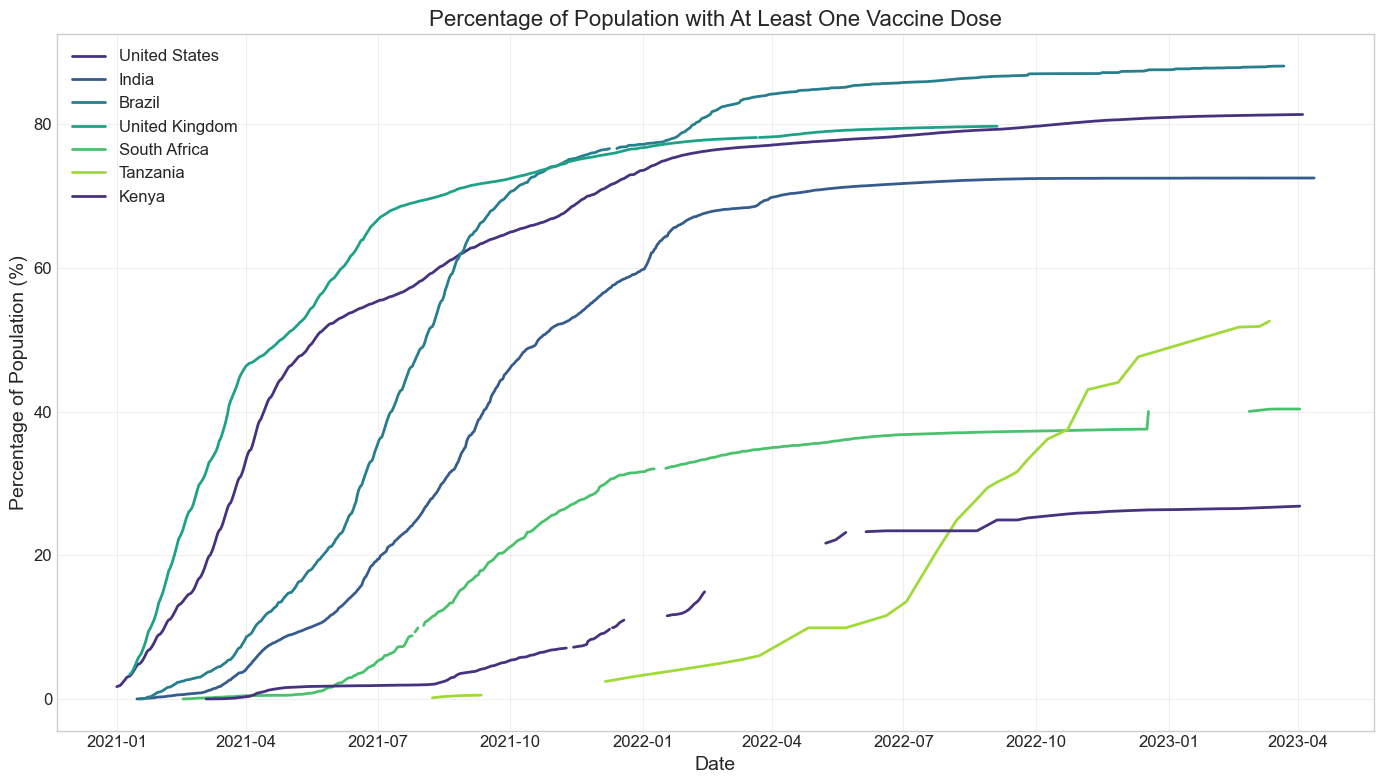

In [23]:
# 2. Plot vaccination percentage
if 'people_vaccinated_per_hundred' in df_vax.columns:
    vax_percent_plot = plot_time_series(
        vax_countries, 
        countries_of_interest, 
        'people_vaccinated_per_hundred', 
        'Percentage of Population with At Least One Vaccine Dose', 
        'Percentage of Population (%)', 
        start_date
    )
    vax_percent_plot.show()

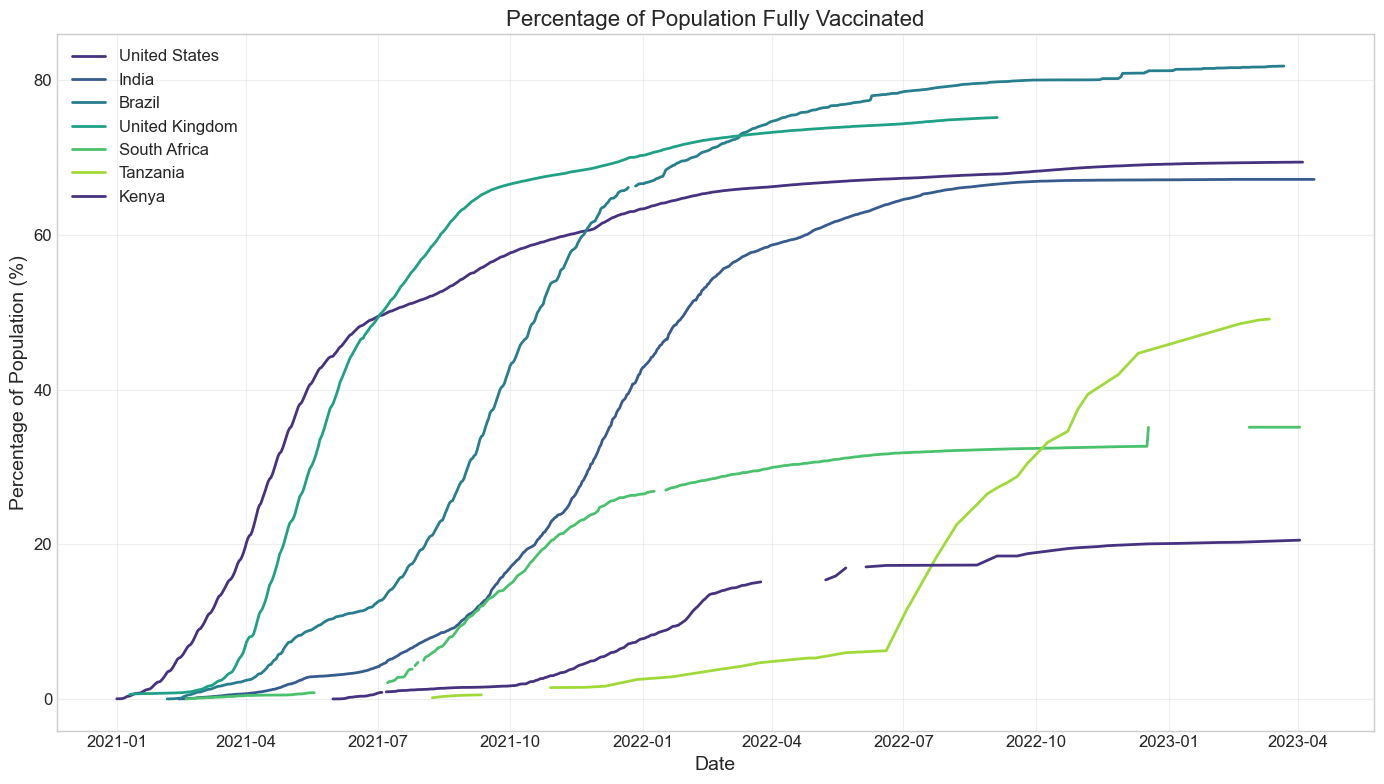

In [24]:
# 3. Plot fully vaccinated percentage
if 'people_fully_vaccinated_per_hundred' in df_vax.columns:
    fully_vax_plot = plot_time_series(
        vax_countries, 
        countries_of_interest, 
        'people_fully_vaccinated_per_hundred', 
        'Percentage of Population Fully Vaccinated', 
        'Percentage of Population (%)', 
        start_date
    )
    fully_vax_plot.show()

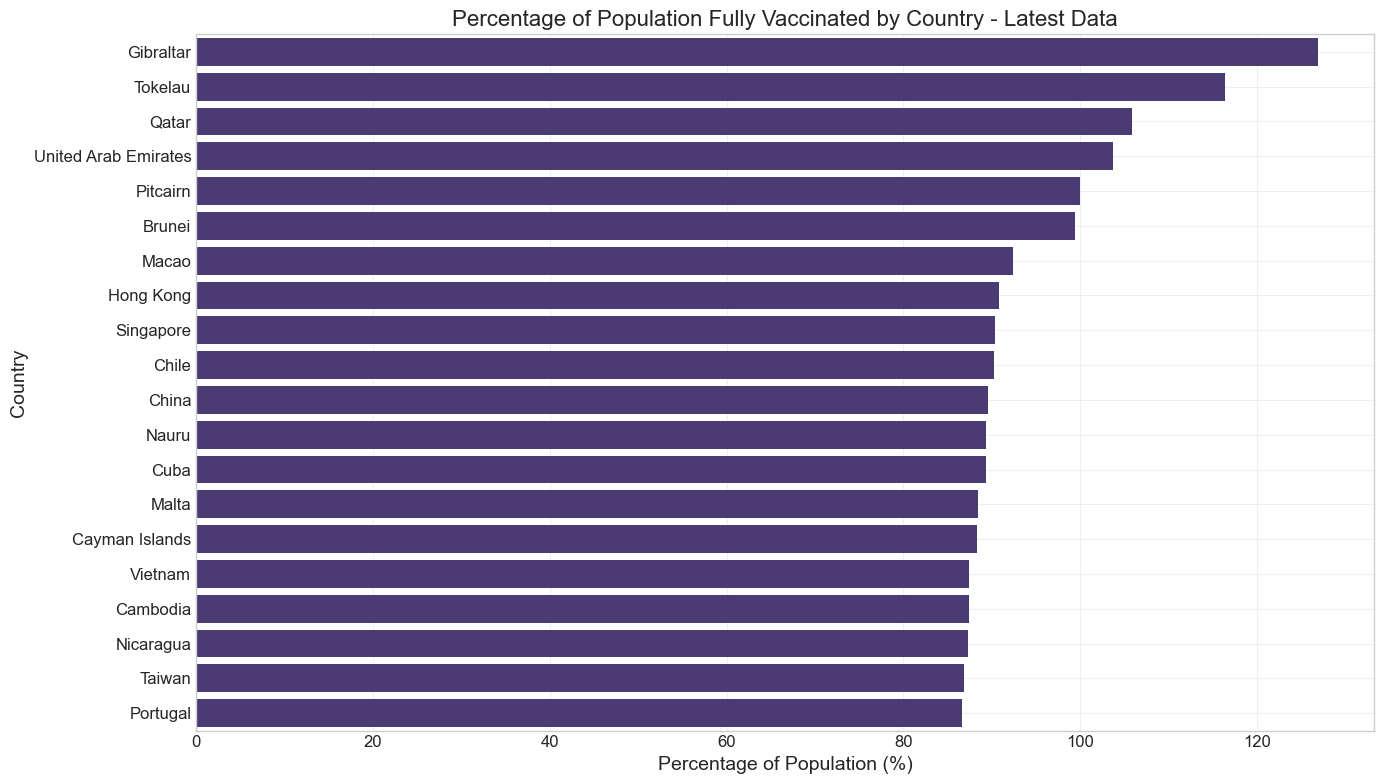

In [25]:
# 4. Compare vaccination rates across countries (latest data)
latest_vax_data = df_vax.loc[df_vax.groupby('location')['date'].idxmax()]
latest_vax_data = latest_vax_data.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(14, 8))
top_vax_countries = latest_vax_data.head(20)  # Top 20 countries by vaccination rate
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=top_vax_countries)
plt.title('Percentage of Population Fully Vaccinated by Country - Latest Data', fontsize=16)
plt.xlabel('Percentage of Population (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
%pip install nbformat

# Geospatial map of vaccination rates by country/region

# Use the latest available data for each country/region
geo_vax = df_vax.loc[df_vax.groupby('location')['date'].idxmax()]

fig = px.choropleth(
    geo_vax,
    locations="iso_code",
    color="people_fully_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale="viridis",
    title="Percentage of Population Fully Vaccinated by Country/Region (Latest Available Data)",
    labels={"people_fully_vaccinated_per_hundred": "Fully Vaccinated (%)"},
    projection="natural earth"
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Insights and Reporting

In [27]:
print("\n--- Key Insights from COVID-19 Data Analysis ---")

# Calculate the latest data for our analysis
latest_date = df['date'].max()
print(f"Latest data available: {latest_date.strftime('%d %B %Y')}")

# Calculate total global cases and deaths
global_totals = df[df['location'] == 'World'].iloc[-1]
if 'total_cases' in global_totals and 'total_deaths' in global_totals:
    print(f"Global COVID-19 Cases: {global_totals['total_cases']:,.0f}")
    print(f"Global COVID-19 Deaths: {global_totals['total_deaths']:,.0f}")
    print(f"Global Case Fatality Rate: {global_totals['case_fatality_rate']:.2f}%")

# Country with highest cases per million (from countries with >1M population)
pop_filter = df['location'].isin(df[df['population'] > 1000000]['location'].unique())
highest_cases_per_million = df[pop_filter].sort_values('total_cases_per_million', ascending=False).iloc[0]
print(f"\nCountry with highest cases per million (>1M population): {highest_cases_per_million['location']}")
print(f"Cases per million: {highest_cases_per_million['total_cases_per_million']:,.0f}")

# Country with highest vaccination rate
if 'people_fully_vaccinated_per_hundred' in df.columns:
    highest_vax_rate = latest_vax_data.iloc[0]
    print(f"\nCountry with highest vaccination rate: {highest_vax_rate['location']}")
    print(f"Percentage fully vaccinated: {highest_vax_rate['people_fully_vaccinated_per_hundred']:.2f}%")

# Country with fastest vaccine rollout
if 'people_fully_vaccinated_per_hundred' in df.columns:
    # Calculate the time taken to reach 50% vaccination rate
    countries_50pct = []
    
    for country in df['location'].unique():
        country_data = df[df['location'] == country]
        if country_data['people_fully_vaccinated_per_hundred'].max() >= 50:
            first_50pct = country_data[country_data['people_fully_vaccinated_per_hundred'] >= 50].iloc[0]
            first_vax = country_data.dropna(subset=['people_fully_vaccinated_per_hundred']).iloc[0]
            days_to_50pct = (first_50pct['date'] - first_vax['date']).days
            countries_50pct.append((country, days_to_50pct))
    
    if countries_50pct:
        fastest_country = min(countries_50pct, key=lambda x: x[1])
        print(f"\nCountry with fastest vaccine rollout to 50%: {fastest_country[0]}")
        print(f"Days to reach 50% fully vaccinated: {fastest_country[1]}")

# Prepare summary insights for the report
print("\n--- Summary Insights ---")
print("1. The COVID-19 pandemic has shown diverse patterns across different regions, with varying peaks and trajectories.")
print("2. Case fatality rates differ significantly between countries, likely due to differences in healthcare systems, population demographics, and testing capacity.")
print("3. Vaccination rates show substantial variation globally, with some countries achieving high coverage while others lag behind.")
print("4. When comparing cases and deaths per million population, the relative impact of COVID-19 reveals a different picture than absolute numbers.")
print("5. The data reveals the importance of timely interventions, as countries with rapid vaccination rollouts generally showed better containment of subsequent waves.")



--- Key Insights from COVID-19 Data Analysis ---
Latest data available: 12 April 2023
Global COVID-19 Cases: 762,790,388
Global COVID-19 Deaths: 6,897,012
Global Case Fatality Rate: 0.90%

Country with highest cases per million (>1M population): Austria
Cases per million: 676,422

Country with highest vaccination rate: Gibraltar
Percentage fully vaccinated: 126.89%

Country with fastest vaccine rollout to 50%: China
Days to reach 50% fully vaccinated: 0

--- Summary Insights ---
1. The COVID-19 pandemic has shown diverse patterns across different regions, with varying peaks and trajectories.
2. Case fatality rates differ significantly between countries, likely due to differences in healthcare systems, population demographics, and testing capacity.
3. Vaccination rates show substantial variation globally, with some countries achieving high coverage while others lag behind.
4. When comparing cases and deaths per million population, the relative impact of COVID-19 reveals a different pic